In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os

In [4]:
path = 'drive/My Drive/cityscapes_data/'

In [5]:
masks = os.listdir(path + 'y_train')

In [6]:
print(masks)

['1955.jpg', '1695.jpg', '1783.jpg', '1899.jpg', '1941.jpg', '1875.jpg', '1637.jpg', '2015.jpg', '2052.jpg', '2022.jpg', '1830.jpg', '1732.jpg', '1947.jpg', '1726.jpg', '2019.jpg', '1946.jpg', '1792.jpg', '1746.jpg', '2142.jpg', '1765.jpg', '1780.jpg', '2101.jpg', '1775.jpg', '2040.jpg', '1994.jpg', '1867.jpg', '1919.jpg', '1987.jpg', '2130.jpg', '1662.jpg', '1978.jpg', '1751.jpg', '2087.jpg', '1721.jpg', '1639.jpg', '1772.jpg', '2060.jpg', '1907.jpg', '1629.jpg', '2031.jpg', '1651.jpg', '1929.jpg', '2063.jpg', '1656.jpg', '1687.jpg', '1960.jpg', '1814.jpg', '1753.jpg', '1859.jpg', '1744.jpg', '1834.jpg', '1892.jpg', '1979.jpg', '2115.jpg', '1911.jpg', '2049.jpg', '2023.jpg', '1679.jpg', '2066.jpg', '1884.jpg', '1627.jpg', '1974.jpg', '1868.jpg', '1709.jpg', '1992.jpg', '1680.jpg', '1939.jpg', '2055.jpg', '1717.jpg', '1957.jpg', '1650.jpg', '1820.jpg', '1666.jpg', '1697.jpg', '1871.jpg', '1636.jpg', '1970.jpg', '1956.jpg', '1997.jpg', '1819.jpg', '1989.jpg', '2137.jpg', '1761.jpg', '21

In [7]:
masks.sort()

In [8]:
original = os.listdir(path + 'x_train')
original.sort()

In [9]:
import cv2
from matplotlib import pyplot as plt

In [10]:
import numpy as np

In [11]:
image_height = 256
image_width = 256

In [12]:
x_train = np.zeros((len(original),image_height,image_width,3),dtype=np.float32)
y_train = np.zeros((len(masks),image_height,image_width,3),dtype=np.float32)

for file in original:
    n = original.index(file)
    path1 = os.path.join(path + 'x_train',file)
    img = cv2.imread(path1,1)
    try:
        img = cv2.resize(img,(256,256))
        x_train[n] = img/255
        file2 = masks[n]
        path2 = os.path.join(path + 'y_train',file2)
        mask = np.array(cv2.imread(path2,1))
        mask = cv2.resize(mask,(256,256))
        y_train[n] = mask/255
    except Exception as e:
        print(e)
        print(path1)

In [14]:
!pip install git+https://github.com/qubvel/segmentation_models

  Cloning https://github.com/qubvel/segmentation_models to /tmp/pip-req-build-p183w1pb
  Running command git clone -q https://github.com/qubvel/segmentation_models /tmp/pip-req-build-p183w1pb
  Running command git submodule update --init --recursive -q
  Created wheel for segmentation-models: filename=segmentation_models-1.0.1-cp37-none-any.whl size=33794 sha256=a419d1c07a3838c4f72e15738155994360b2eefb3b3af901597a478784e7345b
  Stored in directory: /tmp/pip-ephem-wheel-cache-4nspnn9q/wheels/49/cf/46/cbb4bb64518c402aea99df9d466f1081450597e653256bbcf4
Successfully built segmentation-models


In [15]:
with open('x_train.npy', 'wb') as f:
    np.save(f, x_train)

In [16]:
with open('y_train.npy', 'wb') as f:
    np.save(f,y_train)

In [14]:
from keras.layers import Input, Conv2D
from keras.models import Model

from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

AttributeError: ignored

In [17]:
def showImg(img):
    plt.imshow(img)
    plt.axis('off')
    plt.show()

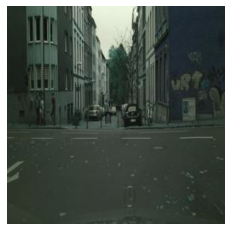

In [18]:
showImg(x_train[0])

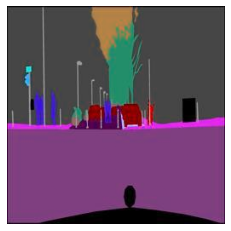

In [19]:
showImg(y_train[0])

In [21]:
pip install tensorflow==2.1.0

In [ ]:
keras.__version__

In [25]:
from tensorflow.keras.layers import Input, Conv2D
from tensorflow.keras.models import Model

from segmentation_models import Unet
from segmentation_models import get_preprocessing
from segmentation_models.losses import bce_jaccard_loss
from segmentation_models.metrics import iou_score

Segmentation Models: using `tf.keras` framework.


In [27]:
masks = os.listdir(path + 'y_val')

In [28]:
original = os.listdir(path + 'x_val')

In [29]:
masks.sort()
original.sort()

In [31]:
x_val = np.zeros((len(original),image_height,image_width,3),dtype=np.float32)
y_val = np.zeros((len(masks),image_height,image_width,3),dtype=np.float32)

for file in original:
    n = original.index(file)
    path1 = os.path.join(path + 'x_val',file)
    img = cv2.imread(path1,1)
    try:
        img = cv2.resize(img,(256,256))
        x_val[n] = img/255
        file2 = masks[n]
        path2 = os.path.join(path + 'y_val',file2)
        mask = np.array(cv2.imread(path2,1))
        mask = cv2.resize(mask,(256,256))
        y_val[n] = mask/255
    except Exception as e:
        print(e)
        print(path1)

In [32]:
backbone = 'resnet34'
preprocess_input = get_preprocessing(backbone)

In [33]:
x_train = preprocess_input(x_train)
x_val = preprocess_input(x_val)

In [34]:
N = x_train.shape[-1]

In [37]:
base_model = Unet(backbone_name='inceptionv3',encoder_weights='imagenet')

In [38]:
inp = Input(shape=(256,256,N))
l1 = Conv2D(3,(1,1))(inp)
out = base_model(l1)
l2 = Conv2D(3,(1,1))(out)
model = Model(inp,l2,name=base_model.name)
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d_189 (Conv2D)          (None, 256, 256, 3)       12        
_________________________________________________________________
model_1 (Model)              multiple                  29933105  
_________________________________________________________________
conv2d_190 (Conv2D)          (None, 256, 256, 3)       6         
Total params: 29,933,123
Trainable params: 29,896,707
Non-trainable params: 36,416
_________________________________________________________________


In [39]:
base_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv2d_95 (Conv2D)              multiple             864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_94 (BatchNo multiple             96          conv2d_95[0][0]                  
__________________________________________________________________________________________________
activation_94 (Activation)      multiple             0           batch_normalization_94[0][0]     
____________________________________________________________________________________________

In [41]:
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy

In [42]:
def dice_coefficient(y_true,y_pred):
    num = 2*tf.reduce_sum(y_true*y_pred)
    deno = tf.reduce_sum(y_true+y_pred)
    return num/(deno + tf.keras.backend.epsilon())

In [43]:
model.compile('Adam',loss = binary_crossentropy,metrics=[dice_coefficient])

In [ ]:
model.fit(x=x_train,y=y_train,batch_size=10,epochs=100,validation_data=(x_val,y_val))

Train on 5950 samples, validate on 500 samples
Epoch 1/100
